# SVM

## Regression Model

In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Load the dataset
file_path = 'CreditDataset.csv'
credit_data = pd.read_csv(file_path)


In [19]:
# Step 1: Preprocessing
# Convert categorical features to numerical using Label Encoding
label_encoder = LabelEncoder()
for column in credit_data.columns:
    if credit_data[column].dtype == 'object':
        credit_data[column] = label_encoder.fit_transform(credit_data[column])


In [33]:
# Step 2: Overview of the data
print("Shape of the dataset:", credit_data.shape)
print("\nFirst 5 rows of the credit_dataset:")
print(credit_data.head())
print("\ncredit_data types and null values:")
print(credit_data.info())
print("\nSummary statistics of numeric columns:")
print(credit_data.describe())

Shape of the dataset: (1000, 21)

First 5 rows of the credit_dataset:
   x1  x2  x3  x4    x5  x6  x7  x8  x9  x10  ...  x12  x13  x14  x15  x16  \
0   0   6   4   4  1169   4   4   4   2    0  ...    0   67    2    1    2   
1   1  48   2   4  5951   0   2   2   1    0  ...    0   22    2    1    1   
2   3  12   4   7  2096   0   3   2   2    0  ...    0   49    2    1    1   
3   0  42   2   3  7882   0   3   2   2    2  ...    1   45    2    2    1   
4   0  24   3   0  4870   0   2   3   2    0  ...    3   53    2    2    2   

   x17  x18  x19  x20  Class  
0    2    1    1    0      1  
1    2    1    0    0      2  
2    1    2    0    0      1  
3    2    2    0    0      1  
4    2    2    0    0      2  

[5 rows x 21 columns]

credit_data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      1000 non-null   int64
 1   

In [34]:
# Step 2: Checking for missing values
missing_values = credit_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
x1       0
x2       0
x3       0
x4       0
x5       0
x6       0
x7       0
x8       0
x9       0
x10      0
x11      0
x12      0
x13      0
x14      0
x15      0
x16      0
x17      0
x18      0
x19      0
x20      0
Class    0
dtype: int64


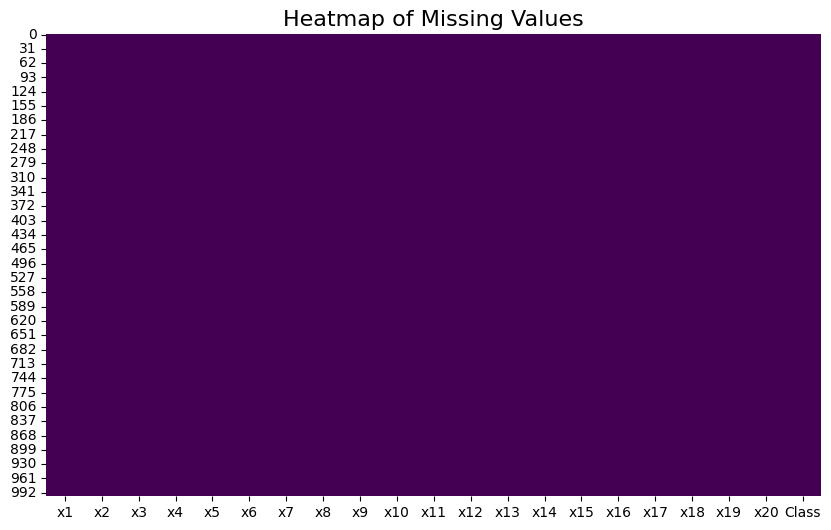

In [35]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(credit_data.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values", fontsize=16)
plt.show()


/var/folders/v7/2r2hb9mj2_n5gpbv6601_8300000gn/T/ipykernel_31345/184129730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=credit_data['Class'], palette='viridis')


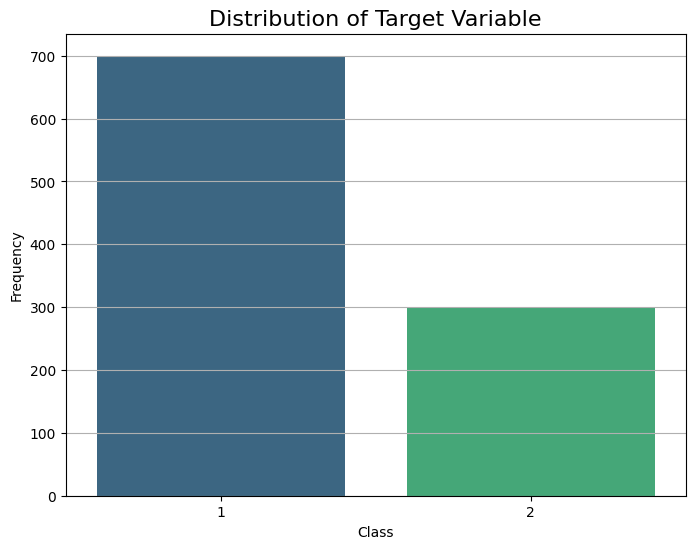

In [36]:
# Step 3: Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=credit_data['Class'], palette='viridis')
plt.title("Distribution of Target Variable", fontsize=16)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

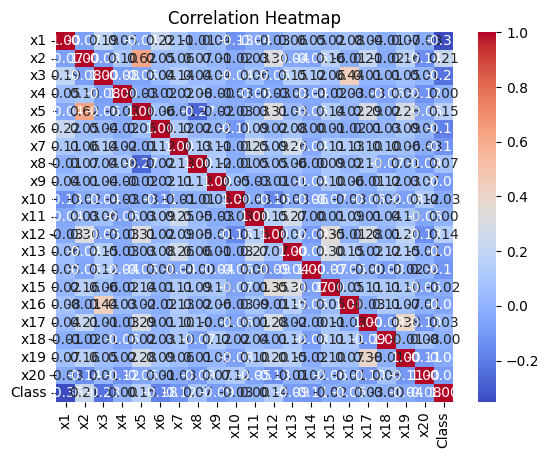

In [43]:
# Step 4: Correlation heatmap
# Encoding categorical variables to numeric for correlation analysis
data_encoded = credit_data.copy()
for col in data_encoded.columns:
    if data_encoded[col].dtype == 'object':
        data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])
        
        plt.figure(figsize=(12, 10))
sns.heatmap(data_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

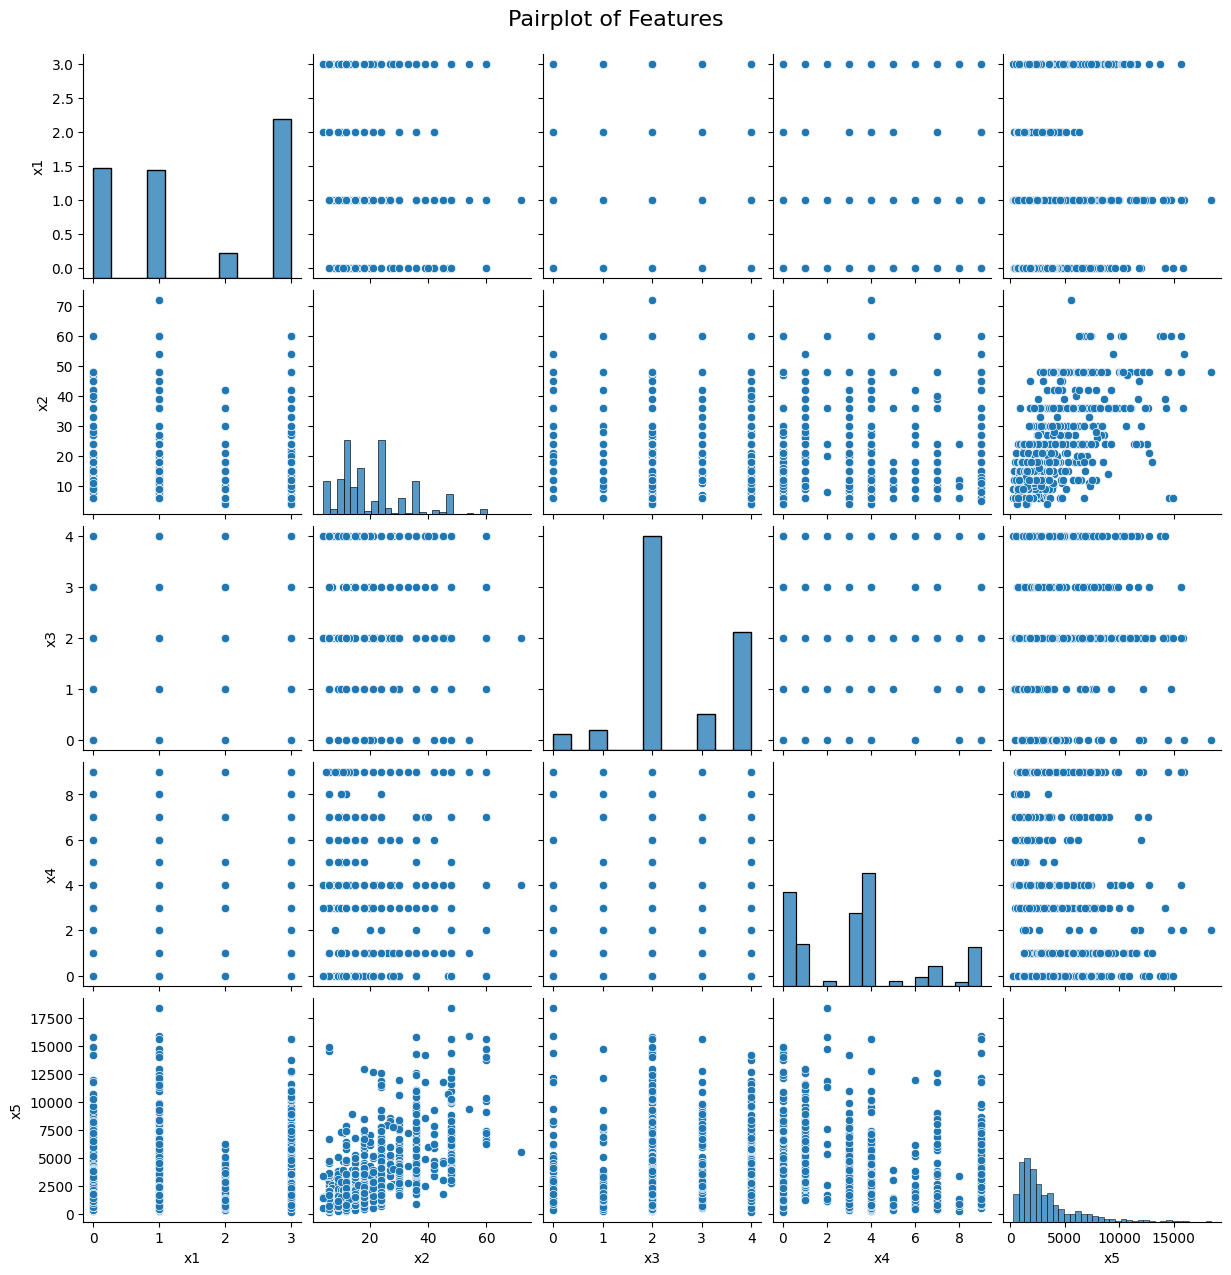

In [44]:
# Step 5: Pairplot for relationships between features
# Selecting a subset of columns for simplicity
subset_features = data_encoded.iloc[:, :5]  # First 5 columns as an example
sns.pairplot(subset_features)
plt.suptitle("Pairplot of Features", fontsize=16, y=1.02)
plt.show()


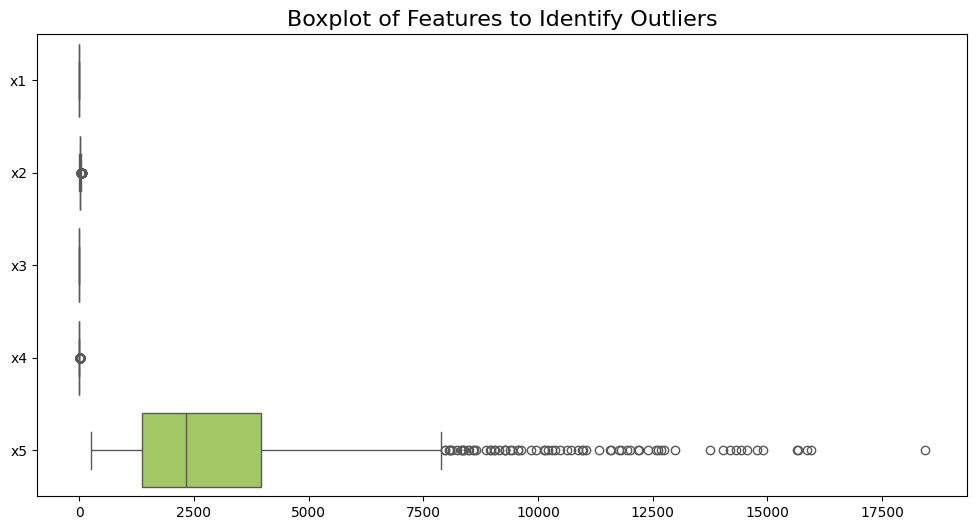

In [45]:
# Step 6: Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_encoded.iloc[:, :5], orient='h', palette='Set2')  # First 5 columns
plt.title("Boxplot of Features to Identify Outliers", fontsize=16)
plt.show()

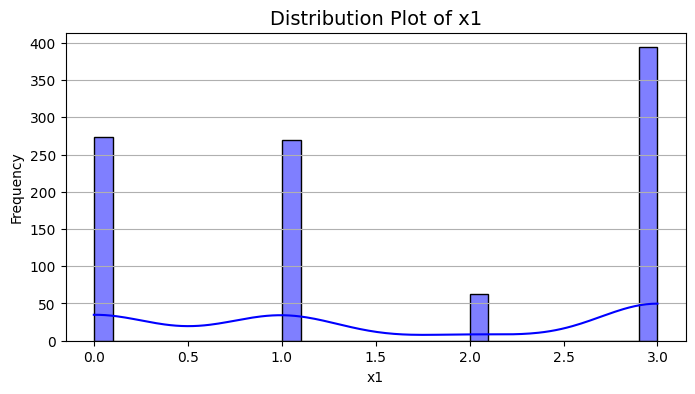

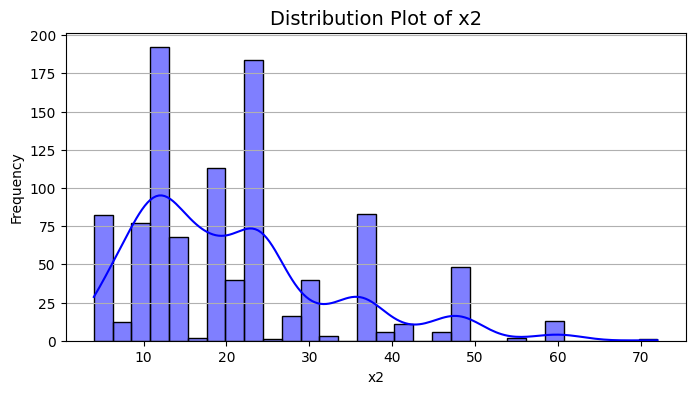

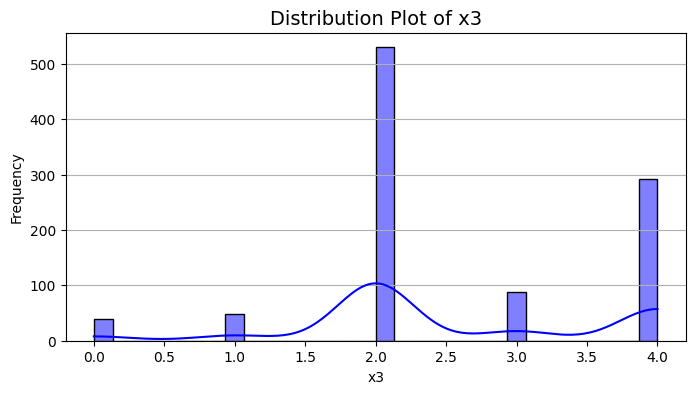

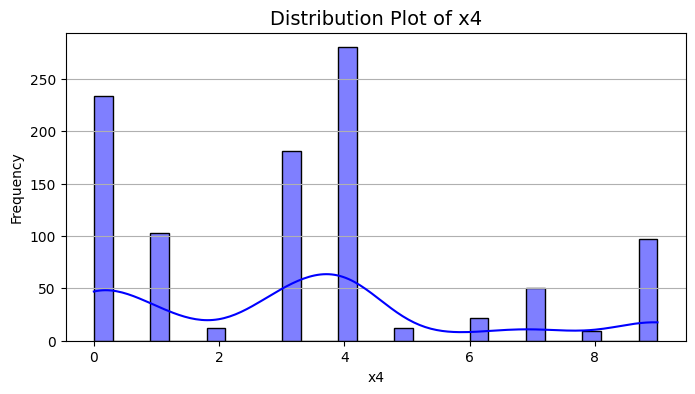

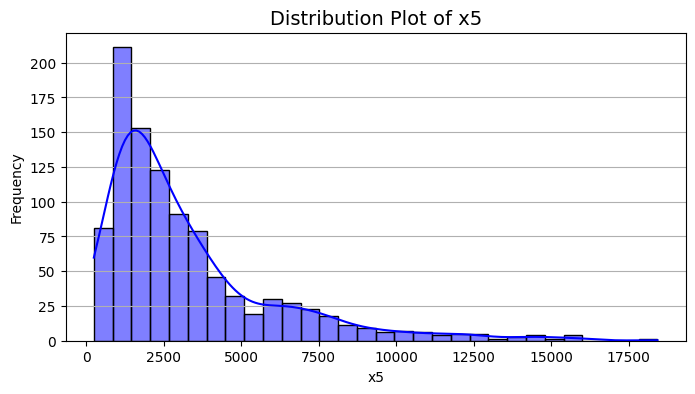

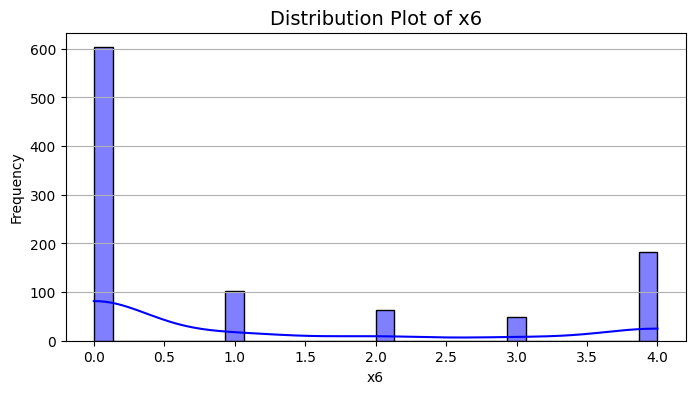

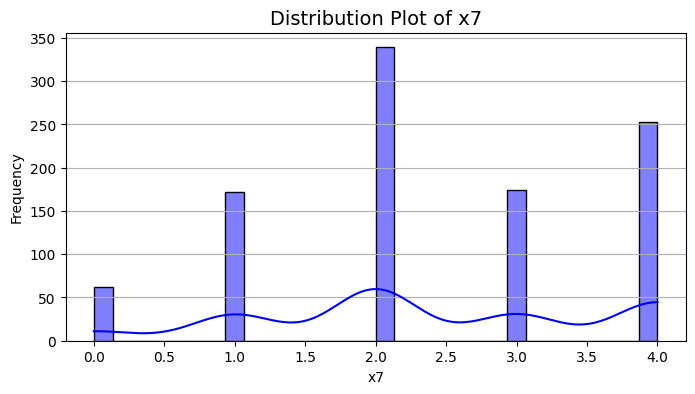

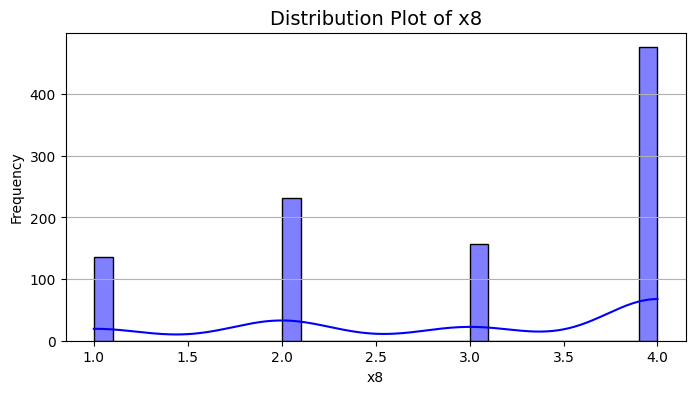

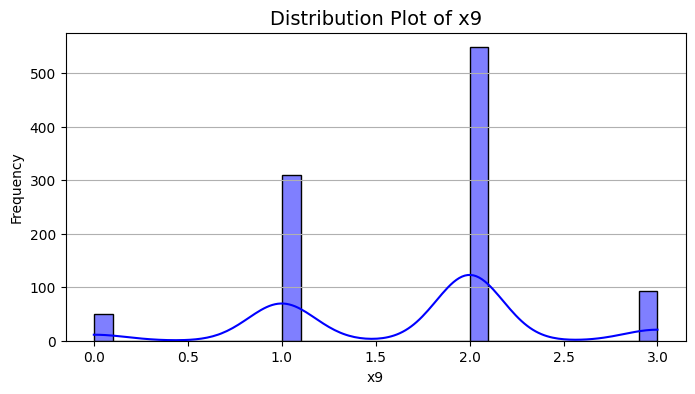

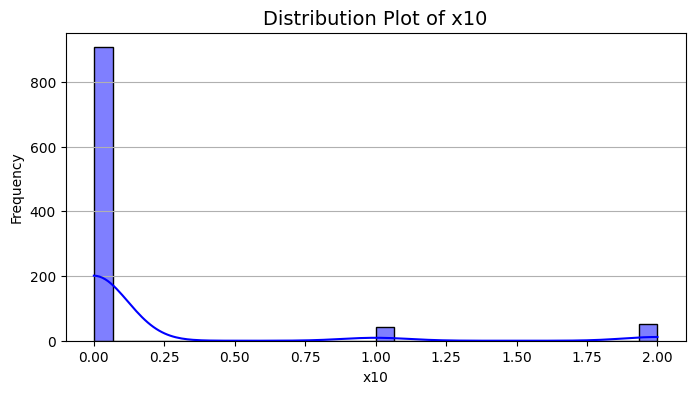

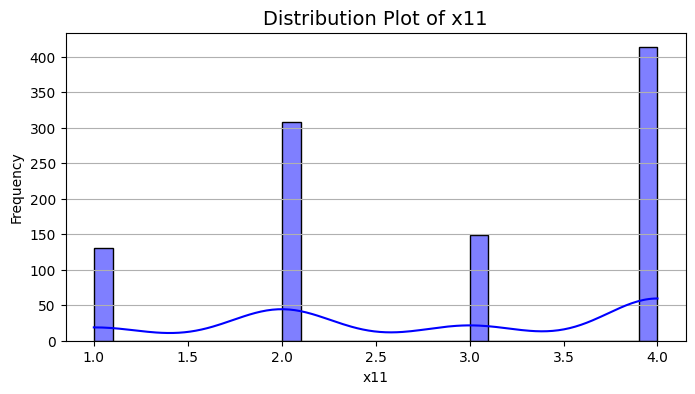

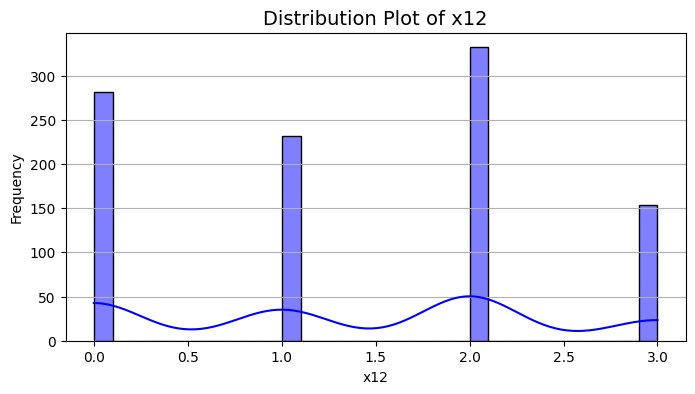

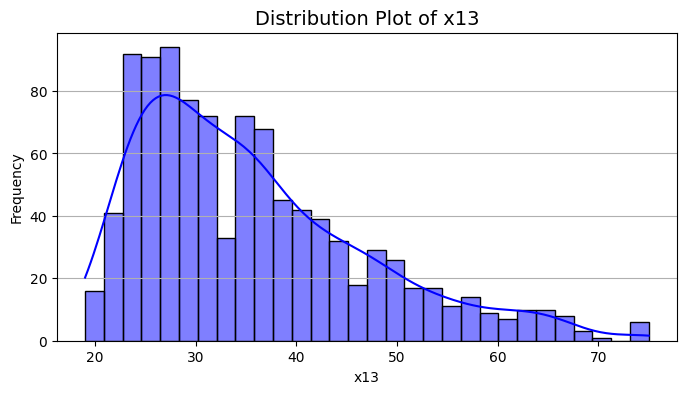

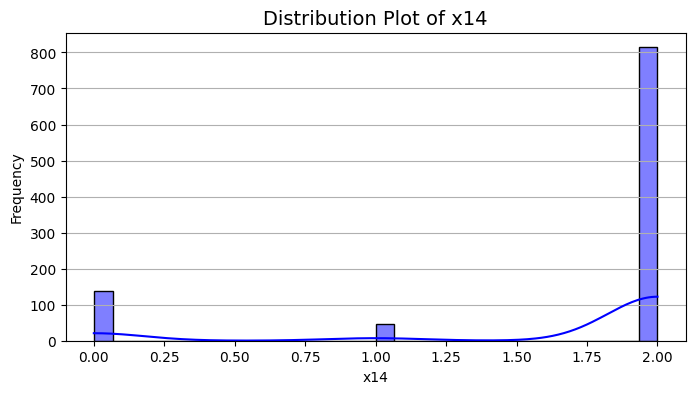

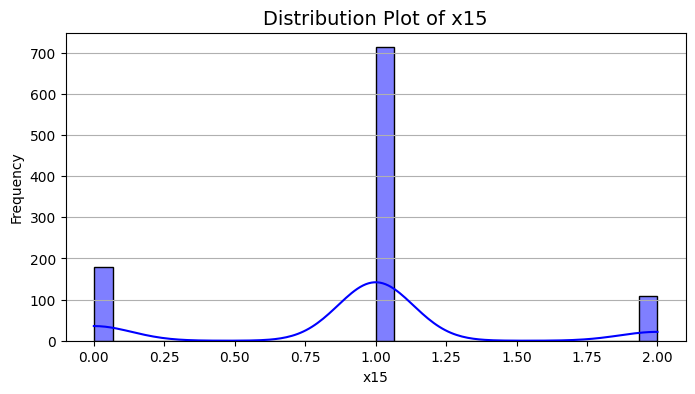

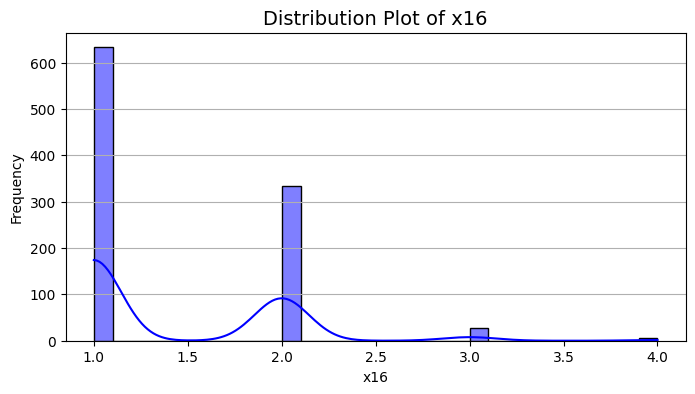

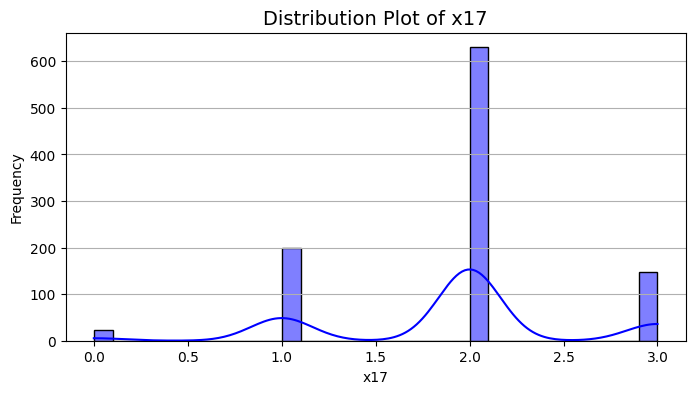

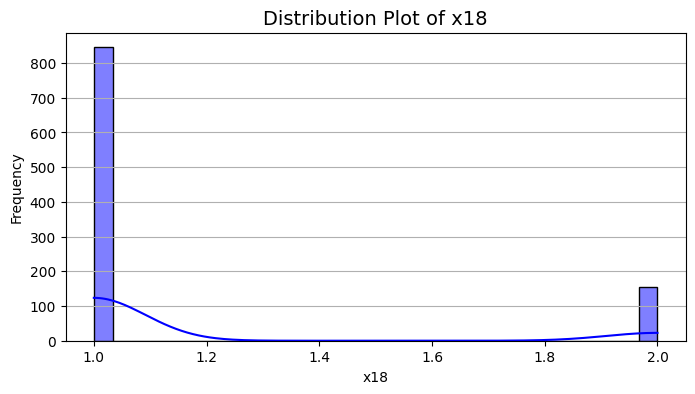

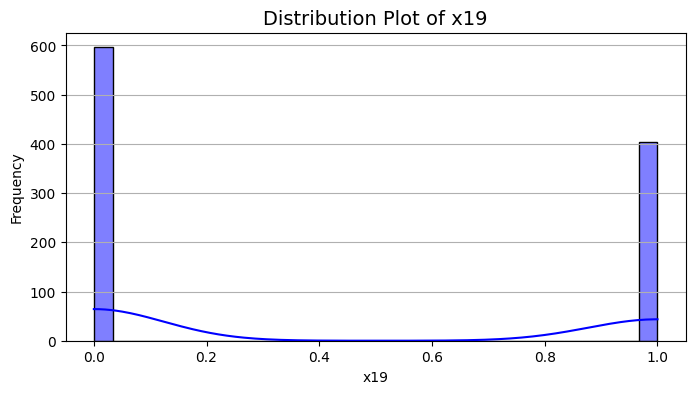

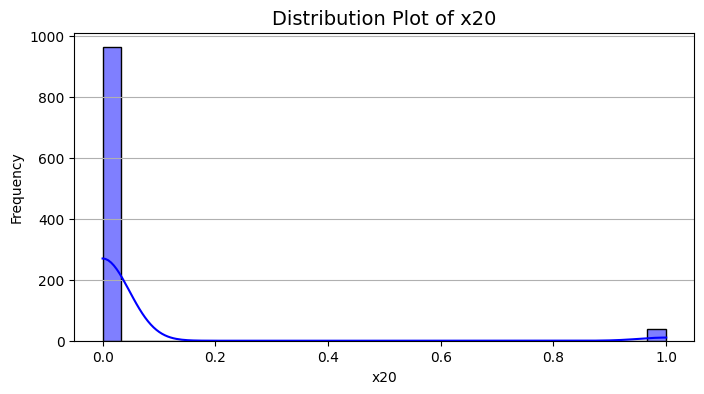

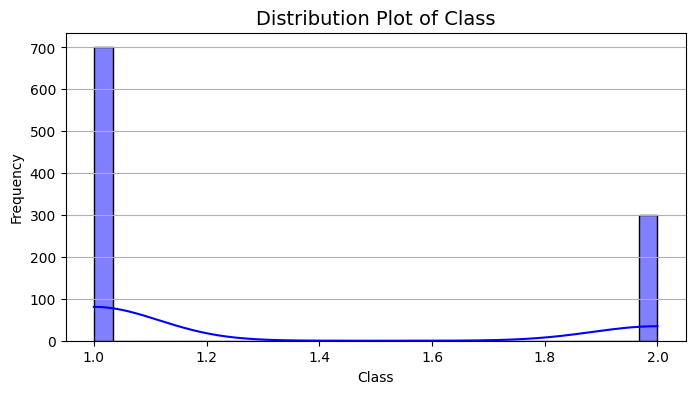

In [46]:
# Step 7: Distribution plots for numeric columns
numeric_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_encoded[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution Plot of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y')
    plt.show()

/var/folders/v7/2r2hb9mj2_n5gpbv6601_8300000gn/T/ipykernel_31345/602153703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_encoded['Class'], y=data_encoded.iloc[:, 0], palette='Set3')  # Feature vs target


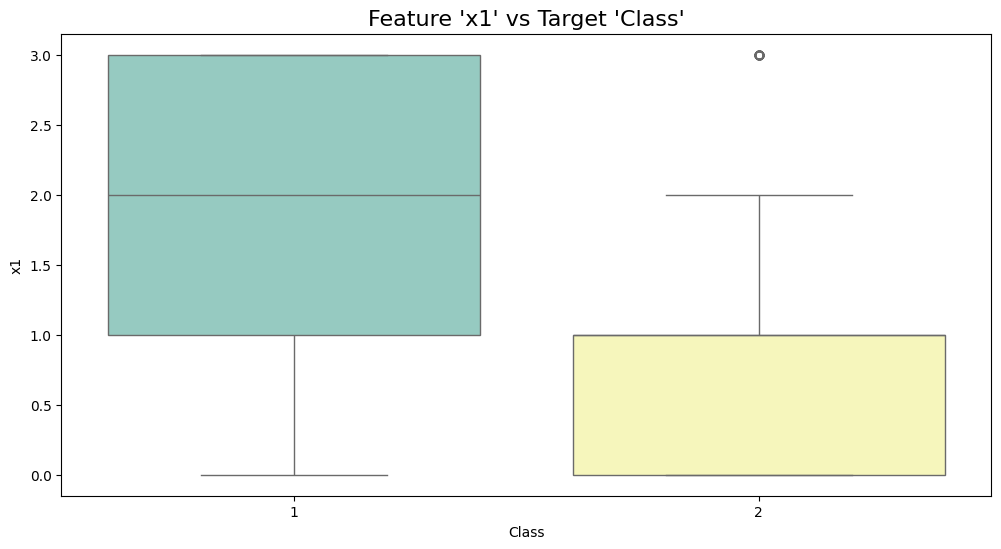

In [47]:
# Step 8: Feature-target relationship using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_encoded['Class'], y=data_encoded.iloc[:, 0], palette='Set3')  # Feature vs target
plt.title(f"Feature '{credit_data.columns[0]}' vs Target 'Class'", fontsize=16)
plt.xlabel("Class")
plt.ylabel(credit_data.columns[0])
plt.show()

In [23]:
# Separate features (X) and target (y)
X = credit_data.drop(columns=["Class"])  # All columns except 'Class' as features
y = credit_data["Class"]  # 'Class' column as the target variable


In [24]:
# Standardize the features for better performance with SVR
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
# Step 9: Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [26]:
# Step 10: Creating and training the SVM Regression model
svm_regressor = SVR(kernel='rbf')  # Using radial basis function kernel
svm_regressor.fit(X_train, y_train)  # Fit the model to the training data


SVR()

In [27]:
# Step 11: Predictions and evaluations
y_pred = svm_regressor.predict(X_test)


In [28]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-Squared Score
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error


In [29]:
# Displaying evaluation metrics
print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Root Squared (r2) : {r2:.4f}")
print(f"Mean Absolute Error (mae) : {mae:.4f}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.1544
Root Mean Squared Error (RMSE): 0.3929
Root Squared (r2) : 0.2577
Mean Absolute Error (mae) : 0.2946


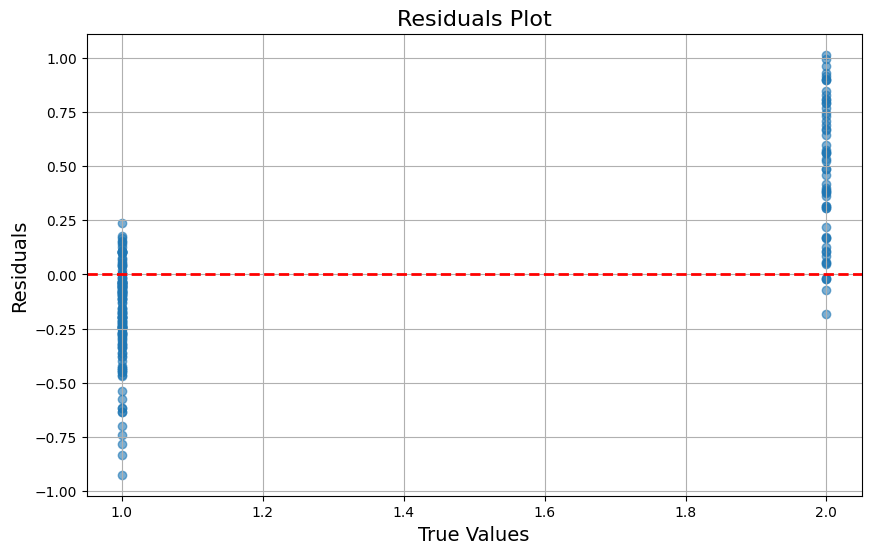

In [30]:
# Visualizing residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title("Residuals Plot", fontsize=16)
plt.xlabel("True Values", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.grid(True)
plt.show()


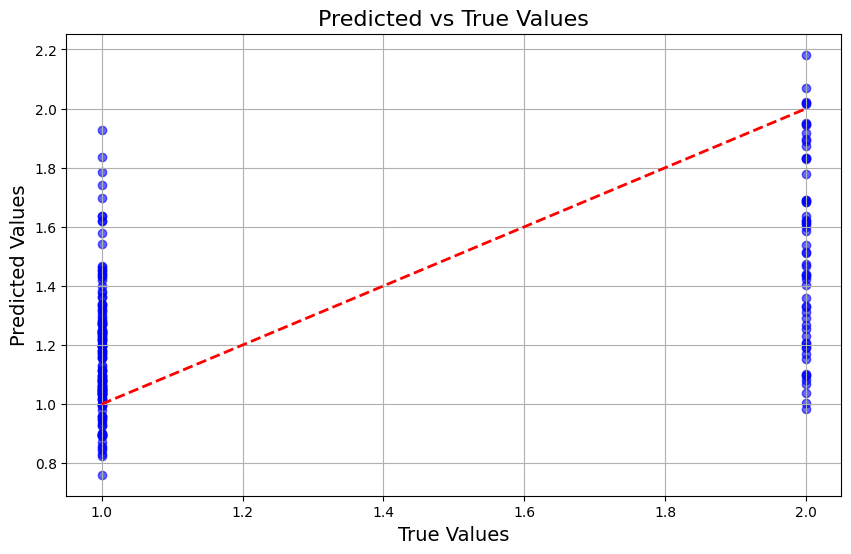

In [31]:

# Plotting predicted vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Predicted vs True Values", fontsize=16)
plt.xlabel("True Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.grid(True)
plt.show()

## Classification Model

In [68]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

In [69]:
# Load dataset
file_path = 'MaterialStrength.csv'
data = pd.read_csv(file_path)

In [70]:
# Step 1: EDA
# Display dataset info
print("Dataset Information:")
print(data.info())
print("\nFirst 5 rows of the dataset:")
print(data.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x1              1030 non-null   float64
 1   x2              1030 non-null   float64
 2   x3              1030 non-null   float64
 3   x4              1030 non-null   float64
 4   x5              1030 non-null   float64
 5   x6              1030 non-null   float64
 6   x7              1030 non-null   float64
 7   x8              1030 non-null   int64  
 8   x9              1030 non-null   float64
 9   x10             1030 non-null   float64
 10  x11             1030 non-null   float64
 11  x12             1030 non-null   int64  
 12  x13             1030 non-null   float64
 13  x14             1030 non-null   object 
 14  x15             1030 non-null   object 
 15  target_feature  1030 non-null   float64
dtypes: float64(12), int64(2), object(2)
memory usage: 128.9+ 

In [71]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
x1                0
x2                0
x3                0
x4                0
x5                0
x6                0
x7                0
x8                0
x9                0
x10               0
x11               0
x12               0
x13               0
x14               0
x15               0
target_feature    0
dtype: int64


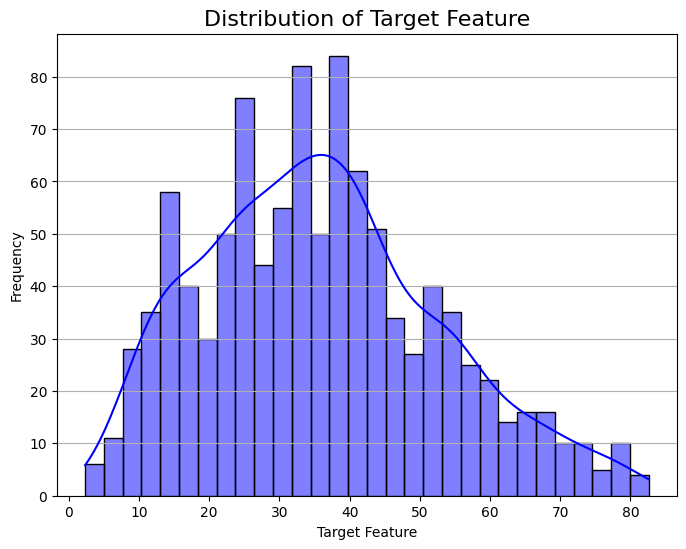

In [72]:
# Distribution of target feature
plt.figure(figsize=(8, 6))
sns.histplot(data['target_feature'], kde=True, bins=30, color='blue')
plt.title("Distribution of Target Feature", fontsize=16)
plt.xlabel("Target Feature")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

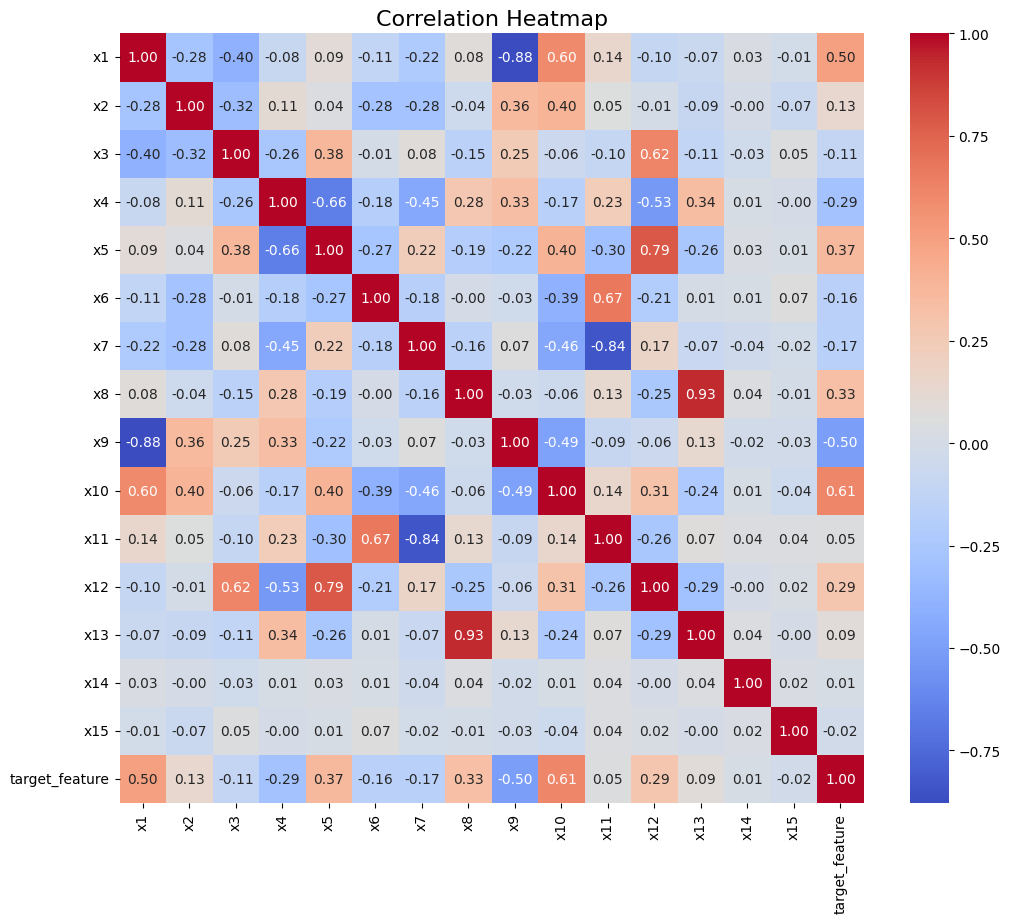

In [73]:
# Correlation heatmap
data_encoded = data.copy()
for col in data.select_dtypes(include=['object']).columns:
    data_encoded[col] = LabelEncoder().fit_transform(data[col])

plt.figure(figsize=(12, 10))
sns.heatmap(data_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

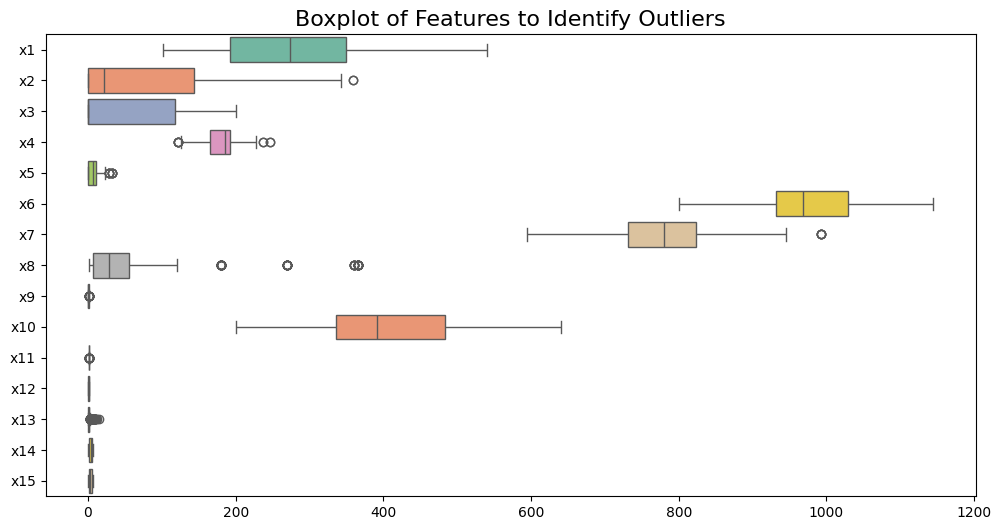

In [74]:
# Boxplot for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_encoded.drop(columns=["target_feature"]), orient='h', palette='Set2')
plt.title("Boxplot of Features to Identify Outliers", fontsize=16)
plt.show()

In [75]:
# Step 2: Preprocessing
# Converting categorical columns to numeric
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

In [76]:
# Separate features and target
X = data.drop(columns=["target_feature"])
y = data["target_feature"]

In [77]:
# Convert target to binary (classification task)
y_binned = (y > y.median()).astype(int)

In [78]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
# Step 3: Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binned, test_size=0.2, random_state=42)


In [80]:
# Step 4: SVM Classification Model
svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [81]:
# Step 5: Predictions and Evaluation
y_pred = svm_classifier.predict(X_test)
y_proba = svm_classifier.predict_proba(X_test)[:, 1]

In [82]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       100
           1       0.88      0.92      0.90       106

    accuracy                           0.90       206
   macro avg       0.90      0.90      0.90       206
weighted avg       0.90      0.90      0.90       206



In [83]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[87 13]
 [ 8 98]]


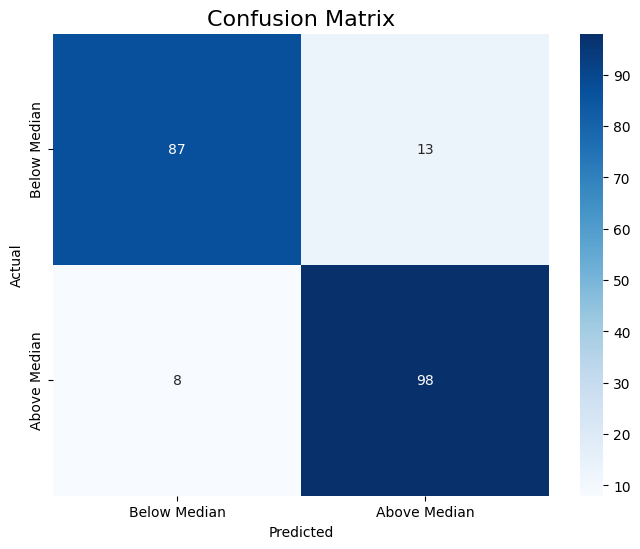

In [84]:
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Below Median", "Above Median"], 
            yticklabels=["Below Median", "Above Median"])
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [85]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

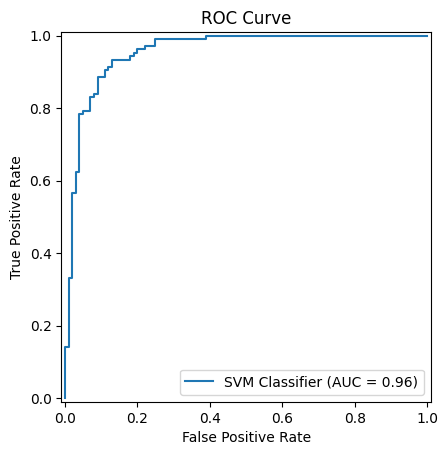

In [86]:
# Plotting ROC Curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="SVM Classifier").plot()
plt.title("ROC Curve")
plt.show()

In [87]:
# Print AUC Score
print(f"AUC Score: {roc_auc:.4f}")

AUC Score: 0.9557


In [88]:
# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print additional metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8981
Precision: 0.8829
Recall: 0.9245
F1 Score: 0.9032
